In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor,HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
import sklearn

In [121]:
sklearn.__version__

'1.1.3'

In [2]:
df = pd.read_csv('calidad-aire.csv')

df

FECHA  HORA CO_CENTENARIO NO2_CENTENARIO PM10_CENTENARIO  \
0       21NOV2009:00:00:00     8          0.39             17             NaN   
1       21NOV2009:00:00:00    15          0.68             15             NaN   
2       21NOV2009:00:00:00    21          0.81             20             NaN   
3       21NOV2009:00:00:00    22          0.85             21             NaN   
4       21NOV2009:00:00:00    24          0.93             22             NaN   
...                    ...   ...           ...            ...             ...   
113622  26NOV2009:00:00:00     9          0.69             41             NaN   
113623  18MAY2019:00:00:00     3          0.56              7              17   
113624  03DEC2014:00:00:00     9          0.68             20              35   
113625  03FEB2019:00:00:00     8          0.13              6              33   
113626  10OCT2018:00:00:00     8          0.25             22              18   

       CO_CORDOBA NO2_CORDOBA PM10_CORDOBA CO_LA_BOCA NO2_LA_BOCA  \
0             s/d          20          NaN        s/d          18   
1             s/d          20          NaN        s/d          16   
2             s/d          18          NaN        s/d          23   
3             s/d          18          NaN        s/d          18   
4             s/d          15          NaN        s/d          25   
...           ...         ...          ...        ...         ...   
113622        s/d         s/d          NaN        s/d          19   
113623       0.51           8           20       0.24           6   
113624       0.39          22          s/d        s/d         s/d   
113625       0.30          33           29       0.28           3   
113626       0.27          38           27       0.31          21   

       PM10_LA_BOCA CO_PALERMO  NO2_PALERMO  PM10_PALERMO  
0               NaN       0.56          NaN           NaN  
1               NaN       1.04          NaN           NaN  
2               NaN       1.16          NaN           NaN  
3               NaN       1.16          NaN           NaN  
4               NaN       1.16          NaN           NaN  
...             ...        ...          ...           ...  
113622          NaN       0.41          NaN           NaN  
113623           32        NaN          NaN           NaN  
113624          s/d        NaN          NaN           NaN  
113625          s/d        NaN          NaN           NaN  
113626           16        NaN          NaN           NaN  

[113627 rows x 14 columns]

In [3]:
df['FECHA'].value_counts()

31MAY2019:00:00:00    49
01JUN2019:00:00:00    48
21DEC2021:00:00:00    41
20APR2012:00:00:00    38
22DEC2021:00:00:00    38
                      ..
25MAY2020:00:00:00    12
12FEB2010:00:00:00    12
17SEP2021:00:00:00    12
01OCT2009:00:00:00    11
01FEB2016:00:00:00     1
Name: FECHA, Length: 4770, dtype: int64

In [4]:
df.isnull().sum()

FECHA                   0
HORA                    0
CO_CENTENARIO         242
NO2_CENTENARIO        241
PM10_CENTENARIO     10548
CO_CORDOBA            242
NO2_CORDOBA           241
PM10_CORDOBA        10548
CO_LA_BOCA            239
NO2_LA_BOCA           241
PM10_LA_BOCA        10545
CO_PALERMO         107623
NO2_PALERMO        113627
PM10_PALERMO       113627
dtype: int64

In [5]:
df[df.duplicated()]

Empty DataFrame
Columns: [FECHA, HORA, CO_CENTENARIO, NO2_CENTENARIO, PM10_CENTENARIO, CO_CORDOBA, NO2_CORDOBA, PM10_CORDOBA, CO_LA_BOCA, NO2_LA_BOCA, PM10_LA_BOCA, CO_PALERMO, NO2_PALERMO, PM10_PALERMO]
Index: []

In [6]:
df.dtypes

FECHA               object
HORA                 int64
CO_CENTENARIO       object
NO2_CENTENARIO      object
PM10_CENTENARIO     object
CO_CORDOBA          object
NO2_CORDOBA         object
PM10_CORDOBA        object
CO_LA_BOCA          object
NO2_LA_BOCA         object
PM10_LA_BOCA        object
CO_PALERMO          object
NO2_PALERMO        float64
PM10_PALERMO       float64
dtype: object

In [7]:
df['fecha_prep'] = df['FECHA'].str[:9]

df['fecha_prep']

0         21NOV2009
1         21NOV2009
2         21NOV2009
3         21NOV2009
4         21NOV2009
            ...    
113622    26NOV2009
113623    18MAY2019
113624    03DEC2014
113625    03FEB2019
113626    10OCT2018
Name: fecha_prep, Length: 113627, dtype: object

In [8]:
df['year'] = df['fecha_prep'].str[5:]

df['year']

0         2009
1         2009
2         2009
3         2009
4         2009
          ... 
113622    2009
113623    2019
113624    2014
113625    2019
113626    2018
Name: year, Length: 113627, dtype: object

In [9]:
df['mes']= df['fecha_prep'].str[2:5]

df['mes']

0         NOV
1         NOV
2         NOV
3         NOV
4         NOV
         ... 
113622    NOV
113623    MAY
113624    DEC
113625    FEB
113626    OCT
Name: mes, Length: 113627, dtype: object

In [10]:
df['dia'] = df['fecha_prep'].str[:2]

df['dia']

0         21
1         21
2         21
3         21
4         21
          ..
113622    26
113623    18
113624    03
113625    03
113626    10
Name: dia, Length: 113627, dtype: object

In [11]:
df_boca =df[['FECHA','CO_LA_BOCA','NO2_LA_BOCA']]
df_boca.isnull().sum()

FECHA            0
CO_LA_BOCA     239
NO2_LA_BOCA    241
dtype: int64

In [12]:
df_centenario = df[['FECHA','CO_CENTENARIO','NO2_CENTENARIO']]
#Columns with null values
df_centenario.isnull().sum()

FECHA               0
CO_CENTENARIO     242
NO2_CENTENARIO    241
dtype: int64

In [13]:
print( "la dimension de df_centenario es:",df_centenario.shape)
print( "la dimension de df_boca es:",df_boca.shape)

la dimension de df_centenario es: (113627, 3)
la dimension de df_boca es: (113627, 3)


In [14]:
#Total of null values
df_centenario.isnull().sum().sum()

483

In [15]:
df_centenario[df_centenario.isnull().any(axis=1)]

FECHA CO_CENTENARIO NO2_CENTENARIO
271     18JAN2010:00:00:00           NaN            NaN
1031    19JAN2011:00:00:00           NaN            NaN
1313    09OCT2010:00:00:00           NaN            NaN
2277    19APR2012:00:00:00           NaN            NaN
2278    19APR2012:00:00:00           NaN            NaN
...                    ...           ...            ...
112099  01OCT2018:00:00:00           NaN            NaN
113060  31MAY2019:00:00:00           NaN            NaN
113436  01JUN2019:00:00:00           NaN            NaN
113528  29JAN2020:00:00:00           NaN            NaN
113589  31MAY2019:00:00:00           NaN            NaN

[242 rows x 3 columns]

In [16]:
df_boca[df_boca.isnull().any(axis=1)]

FECHA CO_LA_BOCA NO2_LA_BOCA
271     18JAN2010:00:00:00        NaN         NaN
1031    19JAN2011:00:00:00        NaN         NaN
1313    09OCT2010:00:00:00        NaN         NaN
2277    19APR2012:00:00:00        NaN         NaN
2278    19APR2012:00:00:00        NaN         NaN
...                    ...        ...         ...
112099  01OCT2018:00:00:00        NaN         NaN
113060  31MAY2019:00:00:00        NaN         NaN
113436  01JUN2019:00:00:00        NaN         NaN
113528  29JAN2020:00:00:00        NaN         NaN
113589  31MAY2019:00:00:00        NaN         NaN

[242 rows x 3 columns]

In [17]:
index =df_centenario[df_centenario.isnull().any(axis=1)].index

index_boca =df_centenario[df_centenario.isnull().any(axis=1)].index

In [18]:
df_centenario.drop(index)

FECHA CO_CENTENARIO NO2_CENTENARIO
0       21NOV2009:00:00:00          0.39             17
1       21NOV2009:00:00:00          0.68             15
2       21NOV2009:00:00:00          0.81             20
3       21NOV2009:00:00:00          0.85             21
4       21NOV2009:00:00:00          0.93             22
...                    ...           ...            ...
113622  26NOV2009:00:00:00          0.69             41
113623  18MAY2019:00:00:00          0.56              7
113624  03DEC2014:00:00:00          0.68             20
113625  03FEB2019:00:00:00          0.13              6
113626  10OCT2018:00:00:00          0.25             22

[113385 rows x 3 columns]

In [19]:
df_boca.drop(index_boca)

FECHA CO_LA_BOCA NO2_LA_BOCA
0       21NOV2009:00:00:00        s/d          18
1       21NOV2009:00:00:00        s/d          16
2       21NOV2009:00:00:00        s/d          23
3       21NOV2009:00:00:00        s/d          18
4       21NOV2009:00:00:00        s/d          25
...                    ...        ...         ...
113622  26NOV2009:00:00:00        s/d          19
113623  18MAY2019:00:00:00       0.24           6
113624  03DEC2014:00:00:00        s/d         s/d
113625  03FEB2019:00:00:00       0.28           3
113626  10OCT2018:00:00:00       0.31          21

[113385 rows x 3 columns]

In [20]:
#df_centenario['fecha_'] =df_centenario['FECHA'].str[:9]

df_centenario.loc[:,'Fecha'] = df_centenario['FECHA'].str[:9]



c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [21]:
df_boca.loc[:,'Fecha'] = df_boca['FECHA'].str[:9]

df_boca

FECHA CO_LA_BOCA NO2_LA_BOCA      Fecha
0       21NOV2009:00:00:00        s/d          18  21NOV2009
1       21NOV2009:00:00:00        s/d          16  21NOV2009
2       21NOV2009:00:00:00        s/d          23  21NOV2009
3       21NOV2009:00:00:00        s/d          18  21NOV2009
4       21NOV2009:00:00:00        s/d          25  21NOV2009
...                    ...        ...         ...        ...
113622  26NOV2009:00:00:00        s/d          19  26NOV2009
113623  18MAY2019:00:00:00       0.24           6  18MAY2019
113624  03DEC2014:00:00:00        s/d         s/d  03DEC2014
113625  03FEB2019:00:00:00       0.28           3  03FEB2019
113626  10OCT2018:00:00:00       0.31          21  10OCT2018

[113627 rows x 4 columns]

In [22]:
df_centenario

FECHA CO_CENTENARIO NO2_CENTENARIO      Fecha
0       21NOV2009:00:00:00          0.39             17  21NOV2009
1       21NOV2009:00:00:00          0.68             15  21NOV2009
2       21NOV2009:00:00:00          0.81             20  21NOV2009
3       21NOV2009:00:00:00          0.85             21  21NOV2009
4       21NOV2009:00:00:00          0.93             22  21NOV2009
...                    ...           ...            ...        ...
113622  26NOV2009:00:00:00          0.69             41  26NOV2009
113623  18MAY2019:00:00:00          0.56              7  18MAY2019
113624  03DEC2014:00:00:00          0.68             20  03DEC2014
113625  03FEB2019:00:00:00          0.13              6  03FEB2019
113626  10OCT2018:00:00:00          0.25             22  10OCT2018

[113627 rows x 4 columns]

In [23]:
df_centenario.dtypes

FECHA             object
CO_CENTENARIO     object
NO2_CENTENARIO    object
Fecha             object
dtype: object

In [24]:
df_boca.dtypes

FECHA          object
CO_LA_BOCA     object
NO2_LA_BOCA    object
Fecha          object
dtype: object

In [25]:
df_centenario['CO_CENTENARIO'].value_counts()

s/d      27373
0.40      2109
0.41      2054
0.43      2054
0.44      2051
         ...  
2.36         1
5.04         1
5.14         1
4.68         1
22.38        1
Name: CO_CENTENARIO, Length: 367, dtype: int64

In [26]:
df_centenario['NO2_CENTENARIO'].value_counts()

s/d      21462
17        4212
14        4206
13        4175
15        4160
         ...  
8.00         1
43.00        1
155          1
19.00        1
9.00         1
Name: NO2_CENTENARIO, Length: 119, dtype: int64

In [27]:
df_boca['CO_LA_BOCA'].value_counts()

s/d      30740
<0.05     8666
0.06      1925
0.07      1676
0.25      1633
         ...  
3.91         1
3.61         1
29.27        1
2.93         1
33.41        1
Name: CO_LA_BOCA, Length: 420, dtype: int64

In [28]:
df_boca['NO2_LA_BOCA'].value_counts()

s/d      22934
12        3965
11        3852
10        3798
13        3717
         ...  
32.00        1
25.00        1
103          1
22.00        1
S/d          1
Name: NO2_LA_BOCA, Length: 126, dtype: int64

In [29]:
code = {"s/d": 0}
#df_centenario['NO2_CENTENARIO'] = df_centenario['NO2_CENTENARIO'].map(code)
#df_centenario['CO_CENTENARIO'] = df_centenario['CO_CENTENARIO'].map(code)

df_centenario['CO_CENTENARIO']=df_centenario['CO_CENTENARIO'].replace("s/d",0)
df_centenario['NO2_CENTENARIO']=df_centenario['NO2_CENTENARIO'].replace("s/d",0)

df_boca['CO_LA_BOCA']=df_boca['CO_LA_BOCA'].replace("S/d",0)
df_boca['NO2_LA_BOCA']=df_boca['NO2_LA_BOCA'].replace("S/d",0)



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10968\2663590604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centenario['CO_CENTENARIO']=df_centenario['CO_CENTENARIO'].replace("s/d",0)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10968\2663590604.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centenario['NO2_CENTENARIO']=df_centenario['NO2_CENTENARIO'].replace("s/d",0)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10968\2663590604.py:8: SettingWithCopyWarning: 
A value is trying to be set on 

In [30]:
df_centenario['CO_CENTENARIO'].value_counts()

0        27373
0.40      2109
0.41      2054
0.43      2054
0.44      2051
         ...  
2.36         1
5.04         1
5.14         1
4.68         1
22.38        1
Name: CO_CENTENARIO, Length: 367, dtype: int64

In [31]:
df_boca['CO_LA_BOCA'].value_counts()

s/d      30740
<0.05     8666
0.06      1925
0.07      1676
0.25      1633
         ...  
3.91         1
3.61         1
29.27        1
2.93         1
33.41        1
Name: CO_LA_BOCA, Length: 420, dtype: int64

In [32]:
df_centenario['CO_CENTENARIO'].isnull().sum()

242

In [33]:
df_centenario['NO2_CENTENARIO'].value_counts()

0        21462
17        4212
14        4206
13        4175
15        4160
         ...  
8.00         1
43.00        1
155          1
19.00        1
9.00         1
Name: NO2_CENTENARIO, Length: 119, dtype: int64

In [34]:
df_centenario['CO_CENTENARIO'].dtypes

dtype('O')

In [35]:
df_centenario['CO_CENTENARIO']=df_centenario['CO_CENTENARIO'].str.extract('(\d+)')





C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10968\837716351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centenario['CO_CENTENARIO']=df_centenario['CO_CENTENARIO'].str.extract('(\d+)')


In [36]:
df_boca['CO_LA_BOCA']=df_boca['CO_LA_BOCA'].str.extract('(\d+)')
df_boca['NO2_LA_BOCA'] = df_boca['NO2_LA_BOCA'].str.extract('(\d+)')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10968\3020466397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boca['CO_LA_BOCA']=df_boca['CO_LA_BOCA'].str.extract('(\d+)')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10968\3020466397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boca['NO2_LA_BOCA'] = df_boca['NO2_LA_BOCA'].str.extract('(\d+)')


In [37]:
df_boca['CO_LA_BOCA'].value_counts()

0     80043
1      2264
2       165
3        25
31       15
32       14
34       14
35       12
27       10
37        8
4         7
25        6
36        6
29        6
33        5
30        5
28        5
24        2
26        2
44        2
38        2
14        1
10        1
40        1
39        1
18        1
22        1
Name: CO_LA_BOCA, dtype: int64

In [38]:
#df_centenario["CO_CENTENARIO"]= df_centenario['CO_CENTENARIO'].str.replace("<", "")

#df_centenario["CO_CENTENARIO"]= df_centenario['CO_CENTENARIO'].str.isdigit()

df_centenario['CO_CENTENARIO'].value_counts()

0     80808
1      4928
2       119
3        22
19       22
22       16
21       10
20       10
18        9
4         5
49        4
5         3
47        3
48        3
38        2
17        2
40        2
30        2
25        2
32        2
16        2
36        1
31        1
35        1
27        1
45        1
24        1
44        1
15        1
42        1
34        1
23        1
14        1
Name: CO_CENTENARIO, dtype: int64

In [39]:
df_boca['NO2_LA_BOCA'].value_counts()

12     3965
11     3852
10     3798
13     3719
15     3676
       ... 
123       1
113       1
95        1
126       1
129       1
Name: NO2_LA_BOCA, Length: 103, dtype: int64

In [40]:
df_centenario['CO_CENTENARIO'] = df_centenario['CO_CENTENARIO'].astype(float)
df_centenario['NO2_CENTENARIO']= df_centenario['NO2_CENTENARIO'].astype(float)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10968\15702454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centenario['CO_CENTENARIO'] = df_centenario['CO_CENTENARIO'].astype(float)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10968\15702454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centenario['NO2_CENTENARIO']= df_centenario['NO2_CENTENARIO'].astype(float)


In [41]:
df_boca['CO_LA_BOCA']=df_boca['CO_LA_BOCA'].astype(float)
df_boca['NO2_LA_BOCA']=df_boca['NO2_LA_BOCA'].astype(float)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10968\393928587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boca['CO_LA_BOCA']=df_boca['CO_LA_BOCA'].astype(float)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10968\393928587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boca['NO2_LA_BOCA']=df_boca['NO2_LA_BOCA'].astype(float)


In [42]:
df_centenario['CO_CENTENARIO'].value_counts()

0.0     80808
1.0      4928
2.0       119
3.0        22
19.0       22
22.0       16
21.0       10
20.0       10
18.0        9
4.0         5
49.0        4
5.0         3
47.0        3
48.0        3
38.0        2
17.0        2
40.0        2
30.0        2
25.0        2
32.0        2
16.0        2
36.0        1
31.0        1
35.0        1
27.0        1
45.0        1
24.0        1
44.0        1
15.0        1
42.0        1
34.0        1
23.0        1
14.0        1
Name: CO_CENTENARIO, dtype: int64

In [43]:
df_boca['CO_LA_BOCA'].value_counts()

0.0     80043
1.0      2264
2.0       165
3.0        25
31.0       15
32.0       14
34.0       14
35.0       12
27.0       10
37.0        8
4.0         7
25.0        6
36.0        6
29.0        6
33.0        5
30.0        5
28.0        5
24.0        2
26.0        2
44.0        2
38.0        2
14.0        1
10.0        1
40.0        1
39.0        1
18.0        1
22.0        1
Name: CO_LA_BOCA, dtype: int64

In [44]:
df_centenario['CO_CENTENARIO'].isnull().sum()

27639

In [45]:
df_centenario['NO2_CENTENARIO'].value_counts()

0.0      21523
17.0      4213
14.0      4207
13.0      4175
15.0      4161
         ...  
86.0         2
155.0        1
112.0        1
95.0         1
98.0         1
Name: NO2_CENTENARIO, Length: 92, dtype: int64

In [46]:
df_centenario_no2=df_centenario.groupby(['Fecha'])[['NO2_CENTENARIO']].mean().reset_index()
df_centenario_co=df_centenario.groupby(['Fecha'])[['CO_CENTENARIO']].mean().reset_index()

In [47]:
df_boca_no2=df_boca.groupby(['Fecha'])[['NO2_LA_BOCA']].mean().reset_index()
df_boca_co=df_boca.groupby(['Fecha'])[['CO_LA_BOCA']].mean().reset_index()

df_boca_no2

Fecha  NO2_LA_BOCA
0     01APR2010    21.625000
1     01APR2011    53.750000
2     01APR2012          NaN
3     01APR2013     8.833333
4     01APR2014    10.375000
...         ...          ...
4765  31OCT2018    13.227273
4766  31OCT2019    26.333333
4767  31OCT2020    12.250000
4768  31OCT2021     3.333333
4769  31OCT2022          NaN

[4770 rows x 2 columns]

In [48]:
df_centenario_no2['NO2_CENTENARIO'].isnull().sum()

1

In [49]:
df_centenario_co['CO_CENTENARIO'].isnull().sum()

1027

In [50]:
df_centenario_co['CO_CENTENARIO'].value_counts()

0.000000     2953
0.166667       87
0.208333       87
0.083333       84
0.041667       82
             ... 
0.176471        1
0.052632        1
0.428571        1
9.500000        1
10.791667       1
Name: CO_CENTENARIO, Length: 76, dtype: int64

In [51]:
df_centenario_co.shape

(4770, 2)

In [52]:
df_boca_co.isnull().sum()

Fecha            0
CO_LA_BOCA    1106
dtype: int64

In [53]:
df_boca_co.value_counts()

Fecha      CO_LA_BOCA
01APR2010  0.0           1
21JAN2013  0.0           1
21JAN2015  0.0           1
21JAN2016  0.0           1
21JAN2017  0.0           1
                        ..
11FEB2015  0.0           1
11FEB2016  0.0           1
11FEB2017  0.0           1
11FEB2018  0.0           1
31OCT2022  0.0           1
Length: 3664, dtype: int64

In [54]:
df_boca_co.shape

(4770, 2)

In [55]:
df_centenario_no2['NO2_CENTENARIO'].value_counts()

0.000000     718
14.791667     19
13.333333     19
13.416667     18
17.791667     17
            ... 
39.166667      1
24.333333      1
34.875000      1
28.958333      1
42.041667      1
Name: NO2_CENTENARIO, Length: 754, dtype: int64

In [56]:
df_centenario_no2[df_centenario_no2.isnull().any(axis=1)]

Fecha  NO2_CENTENARIO
45  01FEB2016             NaN

In [57]:
df_boca_no2[df_boca_no2.isnull().any(axis=1)]

Fecha  NO2_LA_BOCA
2     01APR2012          NaN
9     01APR2019          NaN
23    01AUG2020          NaN
31    01DEC2014          NaN
39    01FEB2010          NaN
...         ...          ...
4740  31MAR2019          NaN
4746  31MAY2012          NaN
4747  31MAY2013          NaN
4754  31MAY2020          NaN
4769  31OCT2022          NaN

[794 rows x 2 columns]

In [58]:
df_centenario_no2 = df_centenario_no2[df_centenario_no2['NO2_CENTENARIO']!=0]
df_boca_no2 = df_boca_no2[df_boca_no2['NO2_LA_BOCA']!=0]

df_centenario_co =df_centenario_co[df_centenario_co['CO_CENTENARIO']!=0]
df_boca_co = df_boca_co[df_boca_co['CO_LA_BOCA']!=0]

In [59]:
df_centenario_no2['NO2_CENTENARIO'].value_counts()

14.791667    19
13.333333    19
13.416667    18
17.791667    17
16.083333    17
             ..
33.208333     1
5.000000      1
37.333333     1
32.250000     1
42.041667     1
Name: NO2_CENTENARIO, Length: 753, dtype: int64

In [60]:
df_boca_no2['NO2_LA_BOCA'].value_counts()

14.833333    15
18.666667    15
8.625000     14
12.416667    13
21.708333    13
             ..
32.363636     1
18.565217     1
31.625000     1
36.708333     1
13.227273     1
Name: NO2_LA_BOCA, Length: 1278, dtype: int64

In [61]:
df_centenario_no2[df_centenario_no2.isnull().any(axis=1)]

Fecha  NO2_CENTENARIO
45  01FEB2016             NaN

In [62]:
df_boca_no2[df_boca_no2.isnull().any(axis=1)]

Fecha  NO2_LA_BOCA
2     01APR2012          NaN
9     01APR2019          NaN
23    01AUG2020          NaN
31    01DEC2014          NaN
39    01FEB2010          NaN
...         ...          ...
4740  31MAR2019          NaN
4746  31MAY2012          NaN
4747  31MAY2013          NaN
4754  31MAY2020          NaN
4769  31OCT2022          NaN

[794 rows x 2 columns]

In [63]:
df_centenario_no2=df_centenario_no2.dropna()
df_boca_no2= df_boca_no2.dropna()

In [64]:
df_centenario_co = df_centenario_co.dropna()
df_boca_co = df_boca_co.dropna()

In [65]:
df_centenario_no2.isnull().sum()

Fecha             0
NO2_CENTENARIO    0
dtype: int64

In [66]:
df_boca_no2.isnull().sum()

Fecha          0
NO2_LA_BOCA    0
dtype: int64

In [67]:
df_centenario_co.isnull().sum()

Fecha            0
CO_CENTENARIO    0
dtype: int64

In [68]:
df_boca_co.isnull().sum()

Fecha         0
CO_LA_BOCA    0
dtype: int64

In [69]:
df_centenario_no2

Fecha  NO2_CENTENARIO
1     01APR2011       35.541667
2     01APR2012       11.375000
4     01APR2014       12.500000
5     01APR2015       19.958333
6     01APR2016       14.958333
...         ...             ...
4764  31OCT2017       22.916667
4765  31OCT2018       13.375000
4766  31OCT2019       15.208333
4767  31OCT2020       13.375000
4768  31OCT2021        8.625000

[4051 rows x 2 columns]

In [70]:
df_centenario_no2['Fecha']= pd.to_datetime(df_centenario_no2['Fecha'])
df_centenario_co['Fecha'] = pd.to_datetime(df_centenario_co['Fecha'])

In [71]:
df_boca_no2['Fecha'] =pd.to_datetime(df_boca_no2['Fecha'])
df_boca_co['Fecha'] = pd.to_datetime(df_boca_co['Fecha'])

In [72]:
df_centenario_no2.dtypes

Fecha             datetime64[ns]
NO2_CENTENARIO           float64
dtype: object

In [73]:
df_boca_no2.dtypes

Fecha          datetime64[ns]
NO2_LA_BOCA           float64
dtype: object

In [74]:
df_centenario_no2= df_centenario_no2.sort_values(by='Fecha')
df_centenario_co = df_centenario_co.sort_values(by='Fecha')

df_centenario_no2

Fecha  NO2_CENTENARIO
131  2009-10-01       34.700000
289  2009-10-02       30.750000
603  2009-10-04       23.833333
761  2009-10-05       29.250000
919  2009-10-06       24.958333
...         ...             ...
4062 2022-10-26       14.791667
4219 2022-10-27       14.625000
4376 2022-10-28       20.416667
4522 2022-10-29       16.500000
4665 2022-10-30        8.166667

[4051 rows x 2 columns]

In [75]:
df_boca_no2= df_boca_no2.sort_values(by='Fecha')
df_boca_co = df_boca_co.sort_values(by='Fecha')

In [76]:
df_centenario_no2['NO2_CENTENARIO'].value_counts()

13.333333    19
14.791667    19
13.416667    18
17.791667    17
16.083333    17
             ..
5.541667      1
2.083333      1
26.458333     1
36.375000     1
37.250000     1
Name: NO2_CENTENARIO, Length: 753, dtype: int64

In [77]:
df_centenario_no2 = df_centenario_no2[df_centenario_no2['NO2_CENTENARIO']!=0]

df_boca_no2 = df_boca_no2[df_boca_no2['NO2_LA_BOCA']!=0]

In [78]:
df_centenario_no2

Fecha  NO2_CENTENARIO
131  2009-10-01       34.700000
289  2009-10-02       30.750000
603  2009-10-04       23.833333
761  2009-10-05       29.250000
919  2009-10-06       24.958333
...         ...             ...
4062 2022-10-26       14.791667
4219 2022-10-27       14.625000
4376 2022-10-28       20.416667
4522 2022-10-29       16.500000
4665 2022-10-30        8.166667

[4051 rows x 2 columns]

In [79]:
df_boca_no2

Fecha  NO2_LA_BOCA
131  2009-10-01    28.000000
289  2009-10-02    35.833333
603  2009-10-04    19.416667
761  2009-10-05    26.125000
919  2009-10-06    16.208333
...         ...          ...
445  2022-11-03    25.583333
602  2022-11-04    10.791667
760  2022-11-05     8.666667
918  2022-11-06     6.833333
1076 2022-11-07     5.750000

[3976 rows x 2 columns]

In [80]:
df_centenario_no2

Fecha  NO2_CENTENARIO
131  2009-10-01       34.700000
289  2009-10-02       30.750000
603  2009-10-04       23.833333
761  2009-10-05       29.250000
919  2009-10-06       24.958333
...         ...             ...
4062 2022-10-26       14.791667
4219 2022-10-27       14.625000
4376 2022-10-28       20.416667
4522 2022-10-29       16.500000
4665 2022-10-30        8.166667

[4051 rows x 2 columns]

In [81]:
df_centenario_no2['dia']=pd.to_datetime(df_centenario_no2['Fecha']).dt.day_of_week

df_centenario_no2['dia'].value_counts()

1    591
4    590
3    588
2    586
0    579
5    565
6    552
Name: dia, dtype: int64

In [82]:
#df_centenario_no2['dia']=pd.to_datetime(df_centenario_no2['Fecha']).dt.day_of_week
df_centenario_no2['dia_año']=pd.to_datetime(df_centenario_no2['Fecha']).dt.day_of_year
df_centenario_no2['mes']=pd.to_datetime(df_centenario_no2['Fecha']).dt.month


df_centenario_co['dia'] = pd.to_datetime(df_centenario_co['Fecha']).dt.day_of_week
df_centenario_co['dia_año'] = pd.to_datetime(df_centenario_co['Fecha']).dt.day_of_year
df_centenario_co['mes'] = pd.to_datetime(df_centenario_co['Fecha']).dt.month


df_boca_no2['dia'] =pd.to_datetime(df_boca_no2['Fecha']).dt.day_of_week
df_boca_no2['dia_año'] =pd.to_datetime(df_boca_no2['Fecha']).dt.day_of_year
df_boca_no2['mes'] =pd.to_datetime(df_boca_no2['Fecha']).dt.month

df_boca_co['dia'] = pd.to_datetime(df_boca_co['Fecha']).dt.day_of_week
df_boca_co['dia_año'] = pd.to_datetime(df_boca_co['Fecha']).dt.day_of_year
df_boca_co['mes']  = pd.to_datetime(df_boca_co['Fecha']).dt.month 





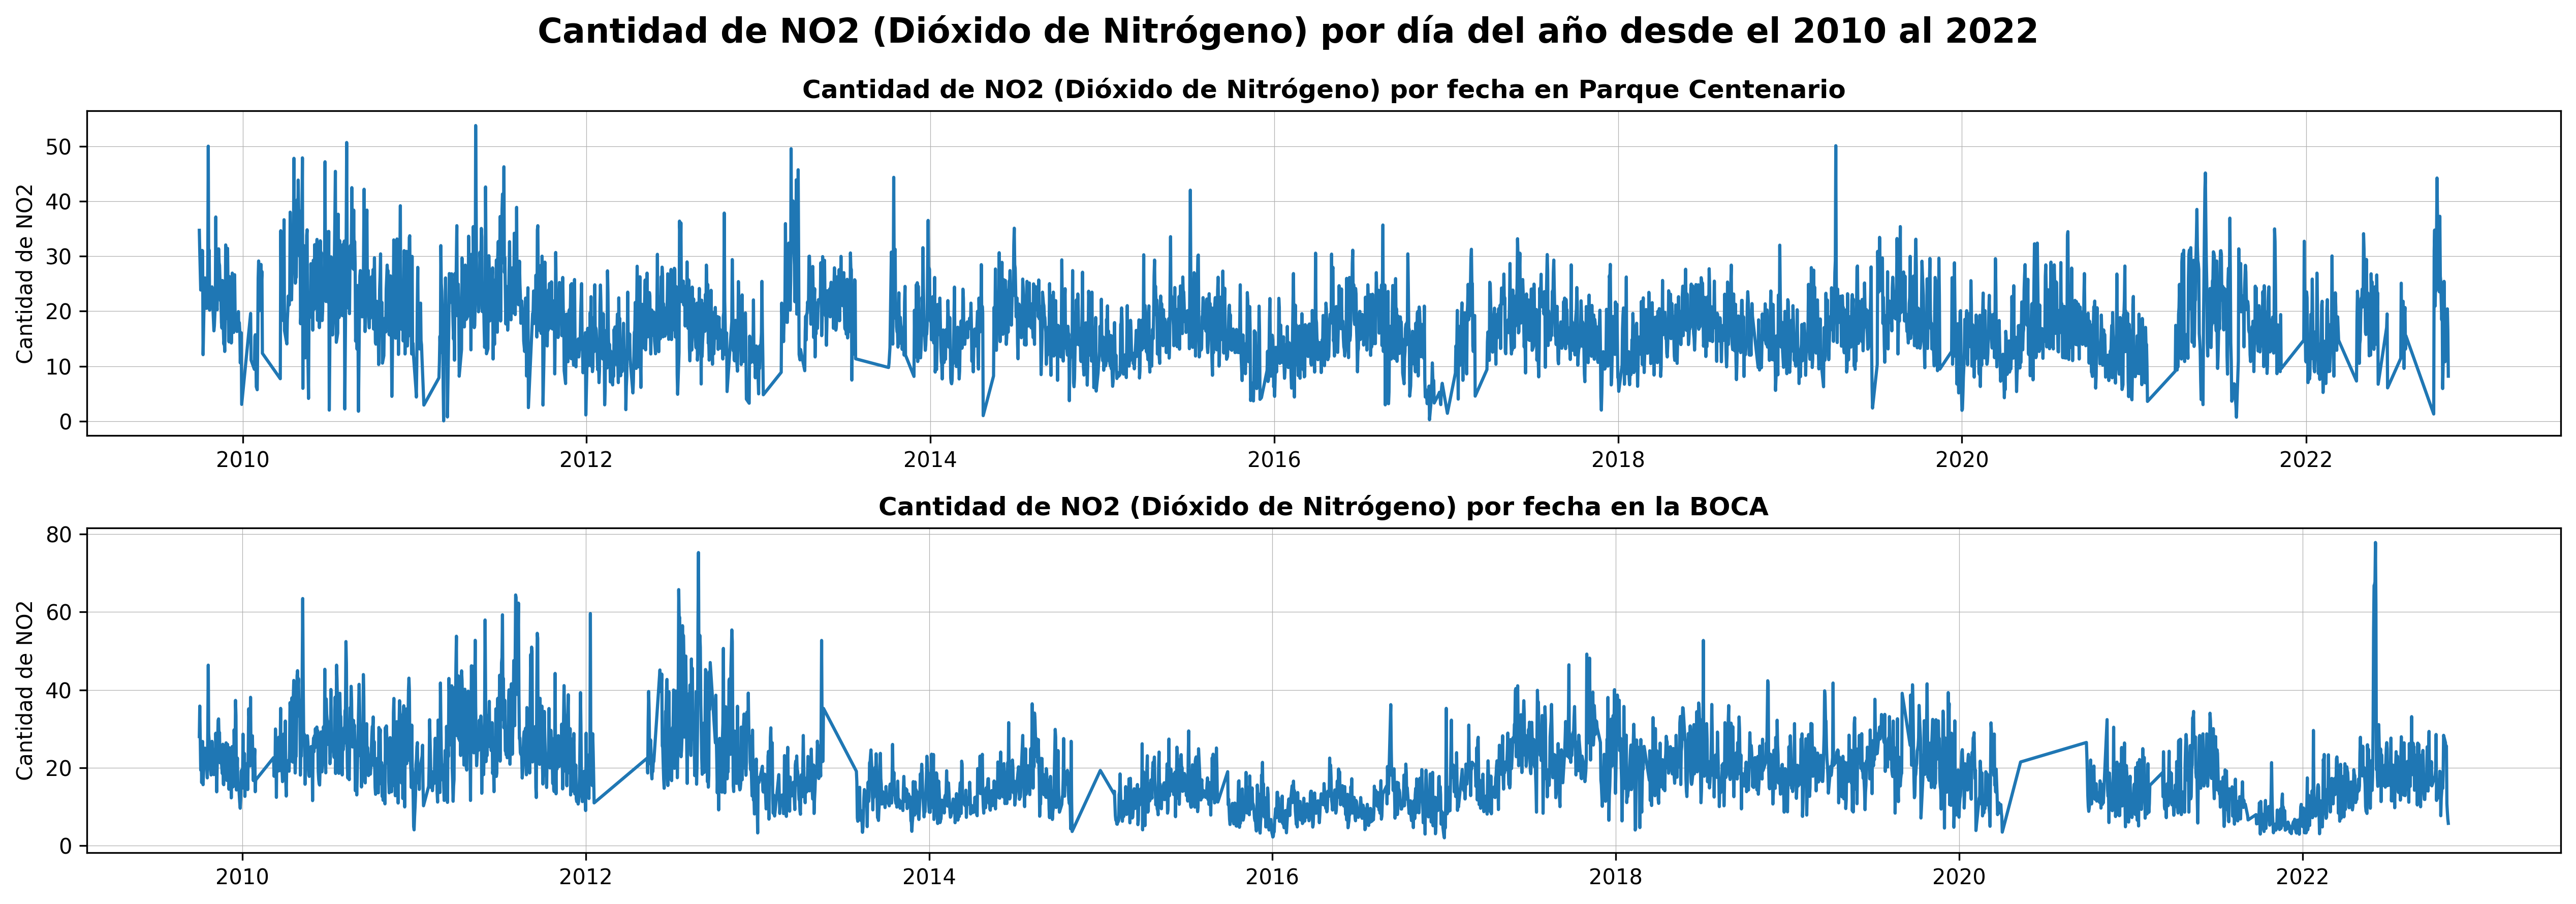

In [83]:
plt.rcParams.update({'figure.figsize':(17,6),'figure.dpi':300})
fig,ax = plt.subplots(nrows=2, ncols=1)

plt.suptitle('Cantidad de NO2 (Dióxido de Nitrógeno) por día del año desde el 2010 al 2022',size=16,weight='bold')

sns.lineplot(data=df_centenario_no2,x='Fecha',y='NO2_CENTENARIO',ax=ax[0])
ax[0].set_title('Cantidad de NO2 (Dióxido de Nitrógeno) por fecha en Parque Centenario',size=12,weight='bold')
ax[0].grid(linestyle='-',linewidth=0.3)
ax[0].set_ylabel('Cantidad de NO2')
ax[0].set_xlabel(None)



sns.lineplot(data=df_boca_no2,x='Fecha',y='NO2_LA_BOCA',ax=ax[1])
ax[1].set_title('Cantidad de NO2 (Dióxido de Nitrógeno) por fecha en la BOCA',size=12,weight='bold')
ax[1].grid(linestyle='-',linewidth=0.3)
ax[1].set_ylabel('Cantidad de NO2')
ax[1].set_xlabel(None)


fig.tight_layout()
plt.show()

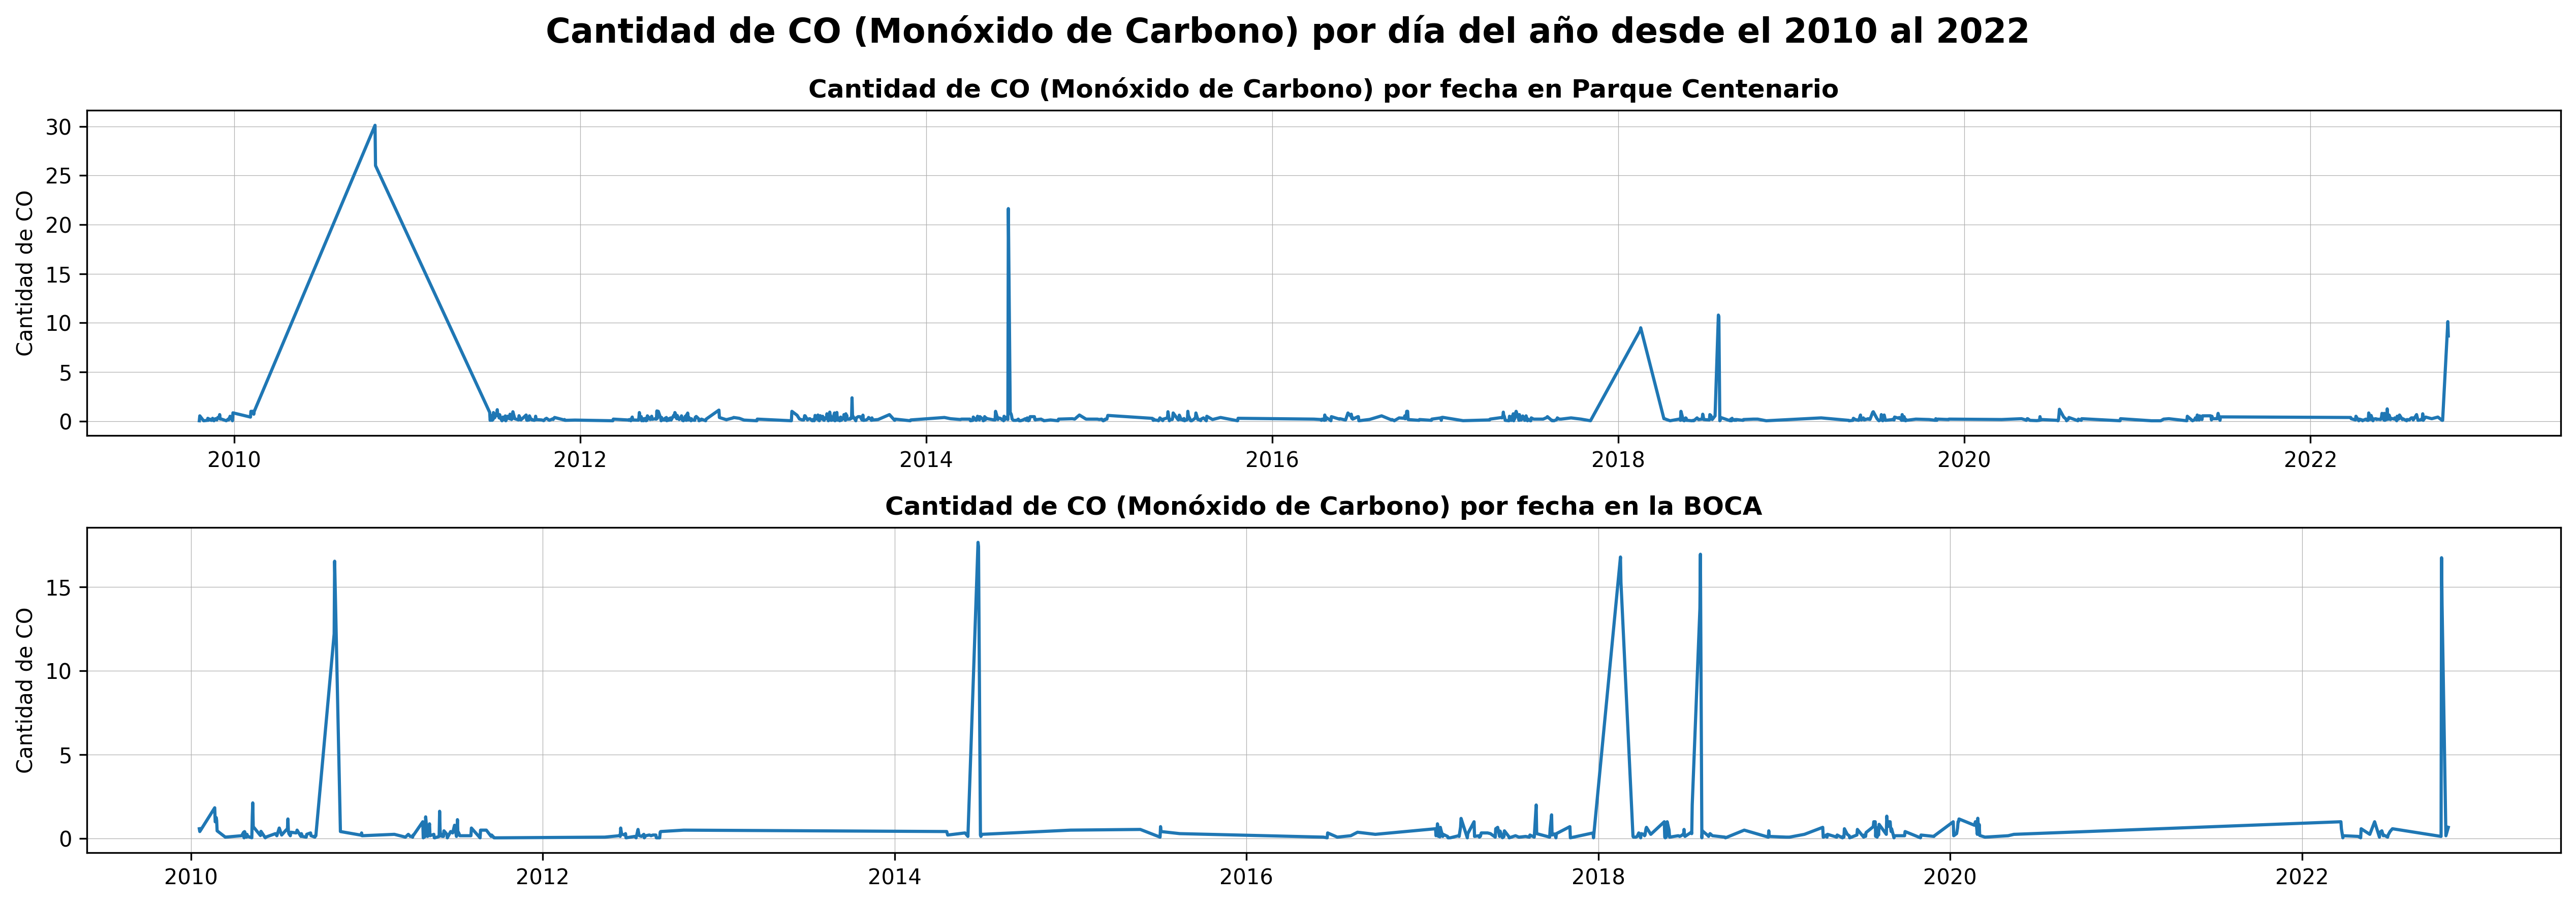

In [84]:
plt.rcParams.update({'figure.figsize':(17,6),'figure.dpi':300})
fig,ax = plt.subplots(nrows=2, ncols=1)

plt.suptitle('Cantidad de CO (Monóxido de Carbono) por día del año desde el 2010 al 2022',size=16,weight='bold')

sns.lineplot(data=df_centenario_co,x='Fecha',y='CO_CENTENARIO',ax=ax[0])
ax[0].set_title('Cantidad de CO (Monóxido de Carbono) por fecha en Parque Centenario',size=12,weight='bold')
ax[0].grid(linestyle='-',linewidth=0.3)
ax[0].set_ylabel('Cantidad de CO')
ax[0].set_xlabel(None)



sns.lineplot(data=df_boca_co,x='Fecha',y='CO_LA_BOCA',ax=ax[1])
ax[1].set_title('Cantidad de CO (Monóxido de Carbono) por fecha en la BOCA',size=12,weight='bold')
ax[1].grid(linestyle='-',linewidth=0.3)
ax[1].set_ylabel('Cantidad de CO')
ax[1].set_xlabel(None)


fig.tight_layout()
plt.show()

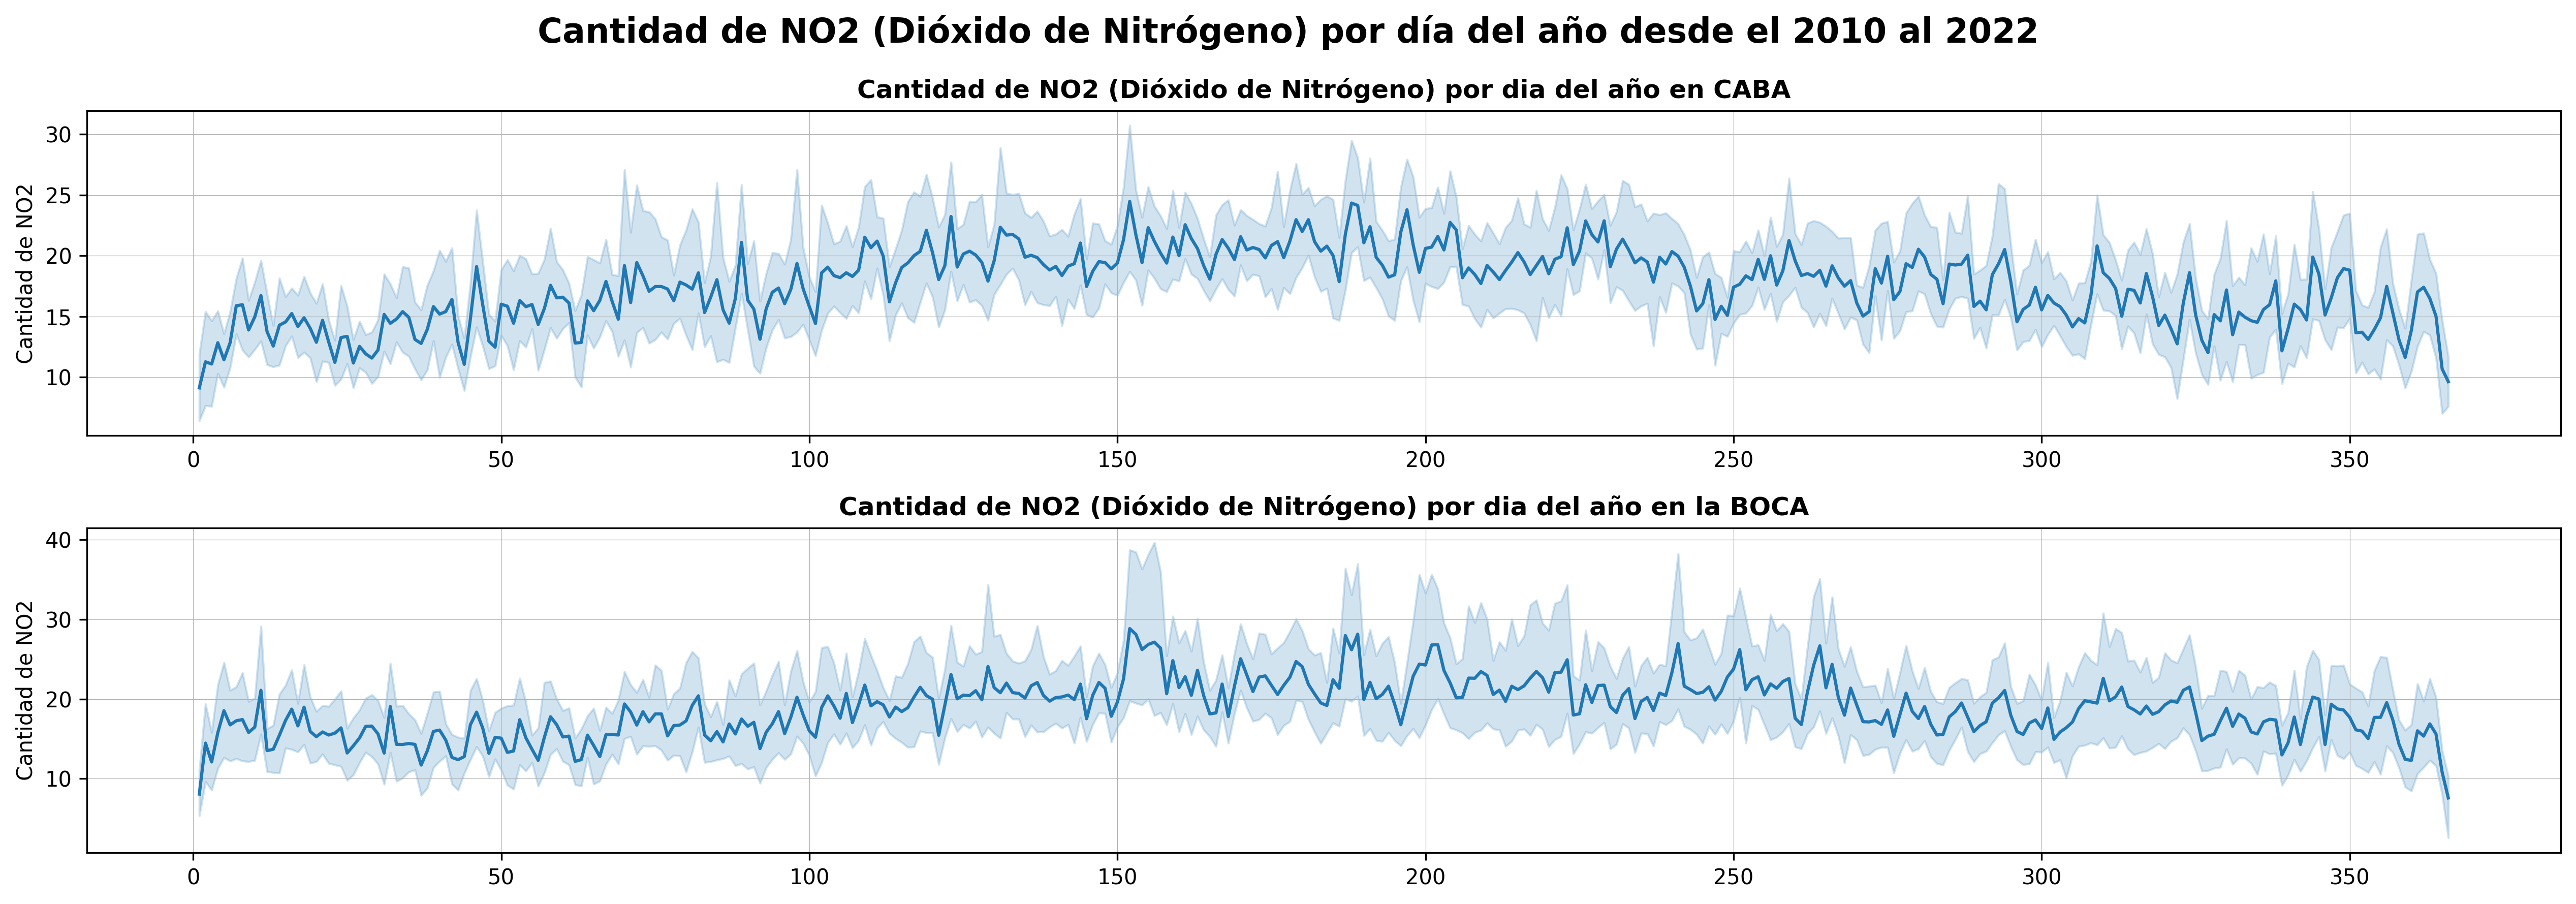

In [85]:
plt.rcParams.update({'figure.figsize':(17,6),'figure.dpi':300})
fig,ax = plt.subplots(nrows=2, ncols=1)
plt.suptitle('Cantidad de NO2 (Dióxido de Nitrógeno) por día del año desde el 2010 al 2022',size=16,weight='bold')

sns.lineplot(data=df_centenario_no2,x='dia_año',y='NO2_CENTENARIO',ax=ax[0])
ax[0].set_title('Cantidad de NO2 (Dióxido de Nitrógeno) por dia del año en CABA',size=12,weight='bold')
ax[0].grid(linestyle='-',linewidth=0.3)
ax[0].set_ylabel('Cantidad de NO2')
ax[0].set_xlabel(None)



sns.lineplot(data=df_boca_no2,x='dia_año',y='NO2_LA_BOCA',ax=ax[1])
ax[1].set_title('Cantidad de NO2 (Dióxido de Nitrógeno) por dia del año en la BOCA',size=12,weight='bold')
ax[1].grid(linestyle='-',linewidth=0.3)
ax[1].set_ylabel('Cantidad de NO2')
ax[1].set_xlabel(None)

fig.tight_layout()
plt.show()

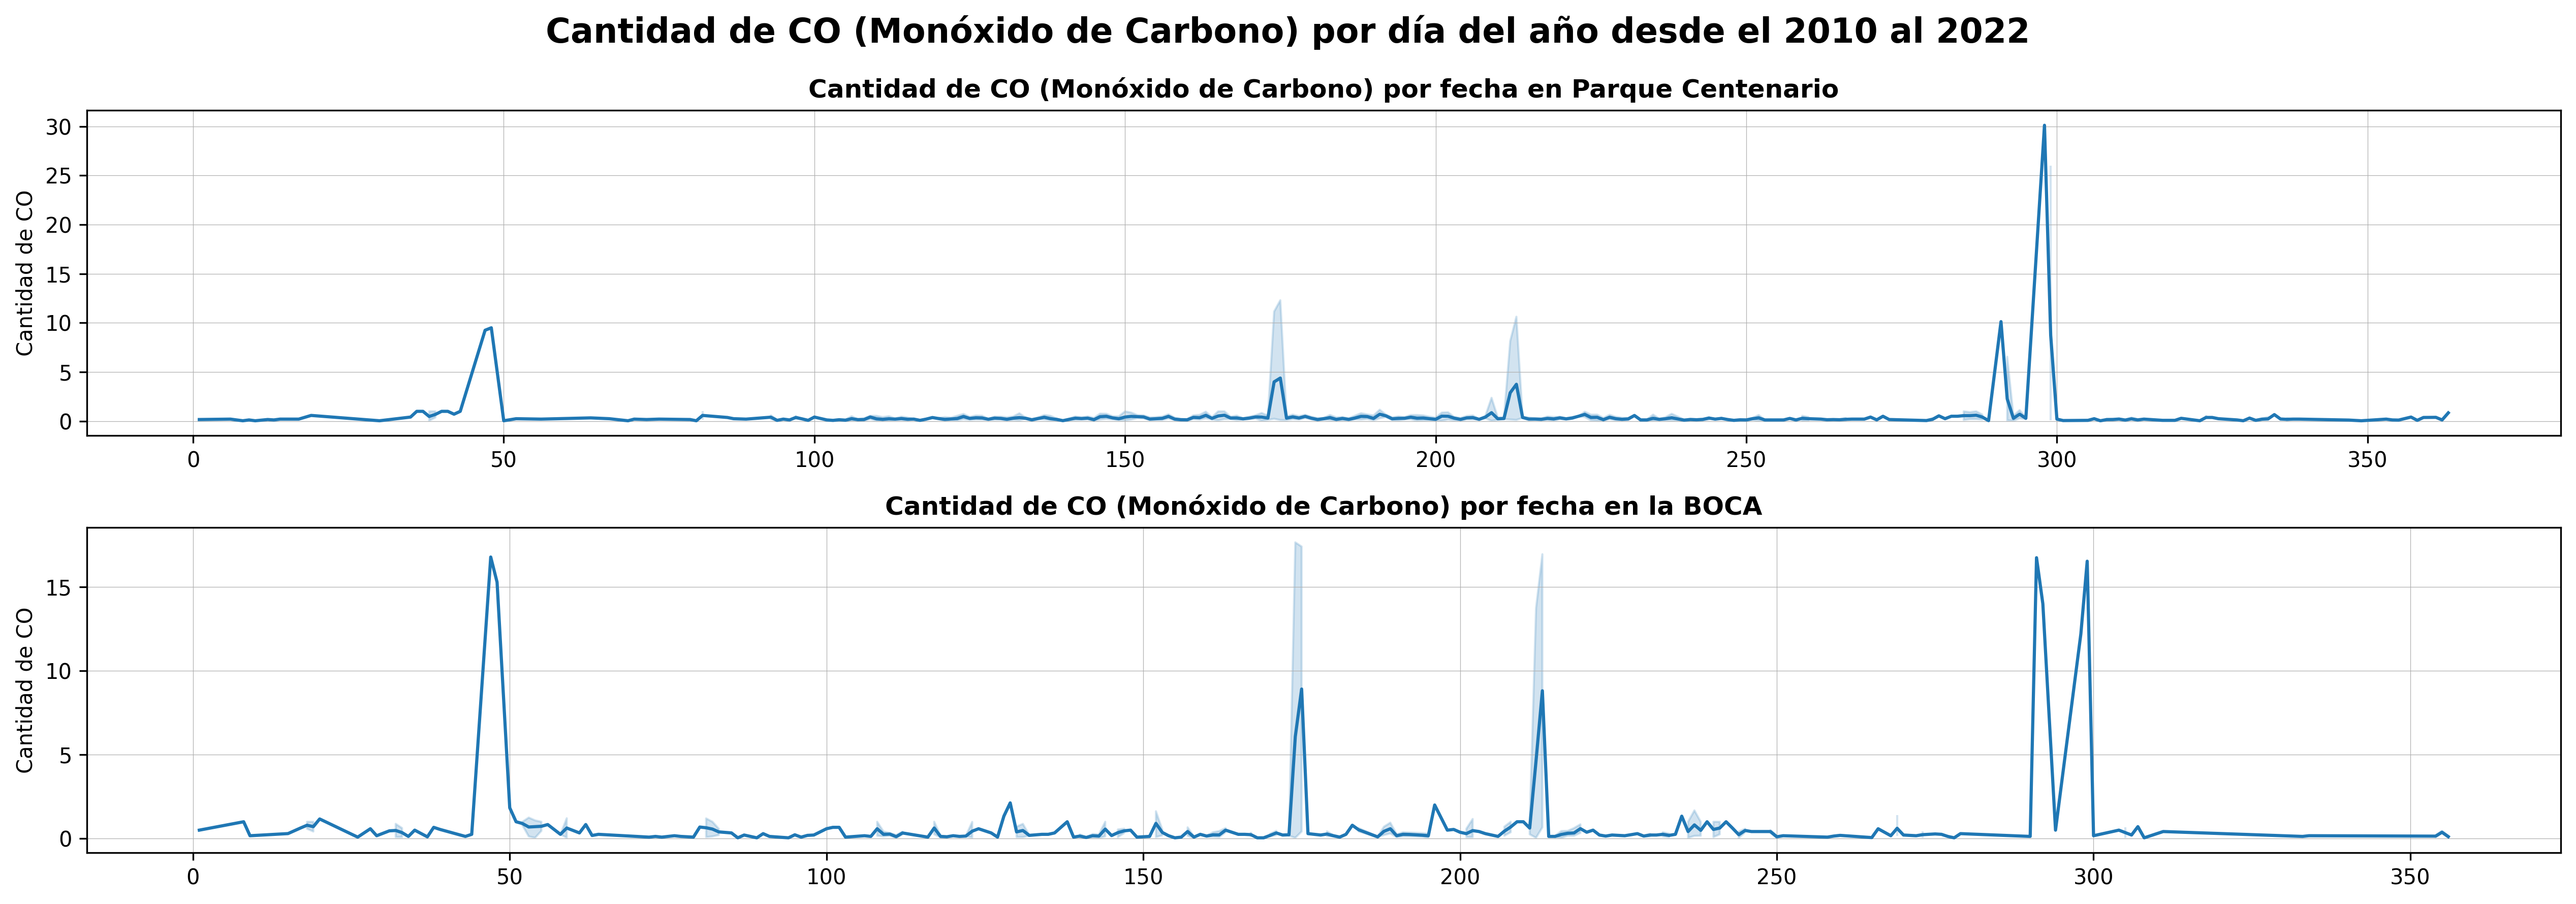

In [86]:
plt.rcParams.update({'figure.figsize':(17,6),'figure.dpi':300})
fig,ax = plt.subplots(nrows=2, ncols=1)

plt.suptitle('Cantidad de CO (Monóxido de Carbono) por día del año desde el 2010 al 2022',size=16,weight='bold')

sns.lineplot(data=df_centenario_co,x='dia_año',y='CO_CENTENARIO',ax=ax[0])
ax[0].set_title('Cantidad de CO (Monóxido de Carbono) por fecha en Parque Centenario',size=12,weight='bold')
ax[0].grid(linestyle='-',linewidth=0.3)
ax[0].set_ylabel('Cantidad de CO')
ax[0].set_xlabel(None)



sns.lineplot(data=df_boca_co,x='dia_año',y='CO_LA_BOCA',ax=ax[1])
ax[1].set_title('Cantidad de CO (Monóxido de Carbono) por fecha en la BOCA',size=12,weight='bold')
ax[1].grid(linestyle='-',linewidth=0.3)
ax[1].set_ylabel('Cantidad de CO')
ax[1].set_xlabel(None)


fig.tight_layout()
plt.show()

In [87]:
df_boca_no2

Fecha  NO2_LA_BOCA  dia  dia_año  mes
131  2009-10-01    28.000000    3      274   10
289  2009-10-02    35.833333    4      275   10
603  2009-10-04    19.416667    6      277   10
761  2009-10-05    26.125000    0      278   10
919  2009-10-06    16.208333    1      279   10
...         ...          ...  ...      ...  ...
445  2022-11-03    25.583333    3      307   11
602  2022-11-04    10.791667    4      308   11
760  2022-11-05     8.666667    5      309   11
918  2022-11-06     6.833333    6      310   11
1076 2022-11-07     5.750000    0      311   11

[3976 rows x 5 columns]

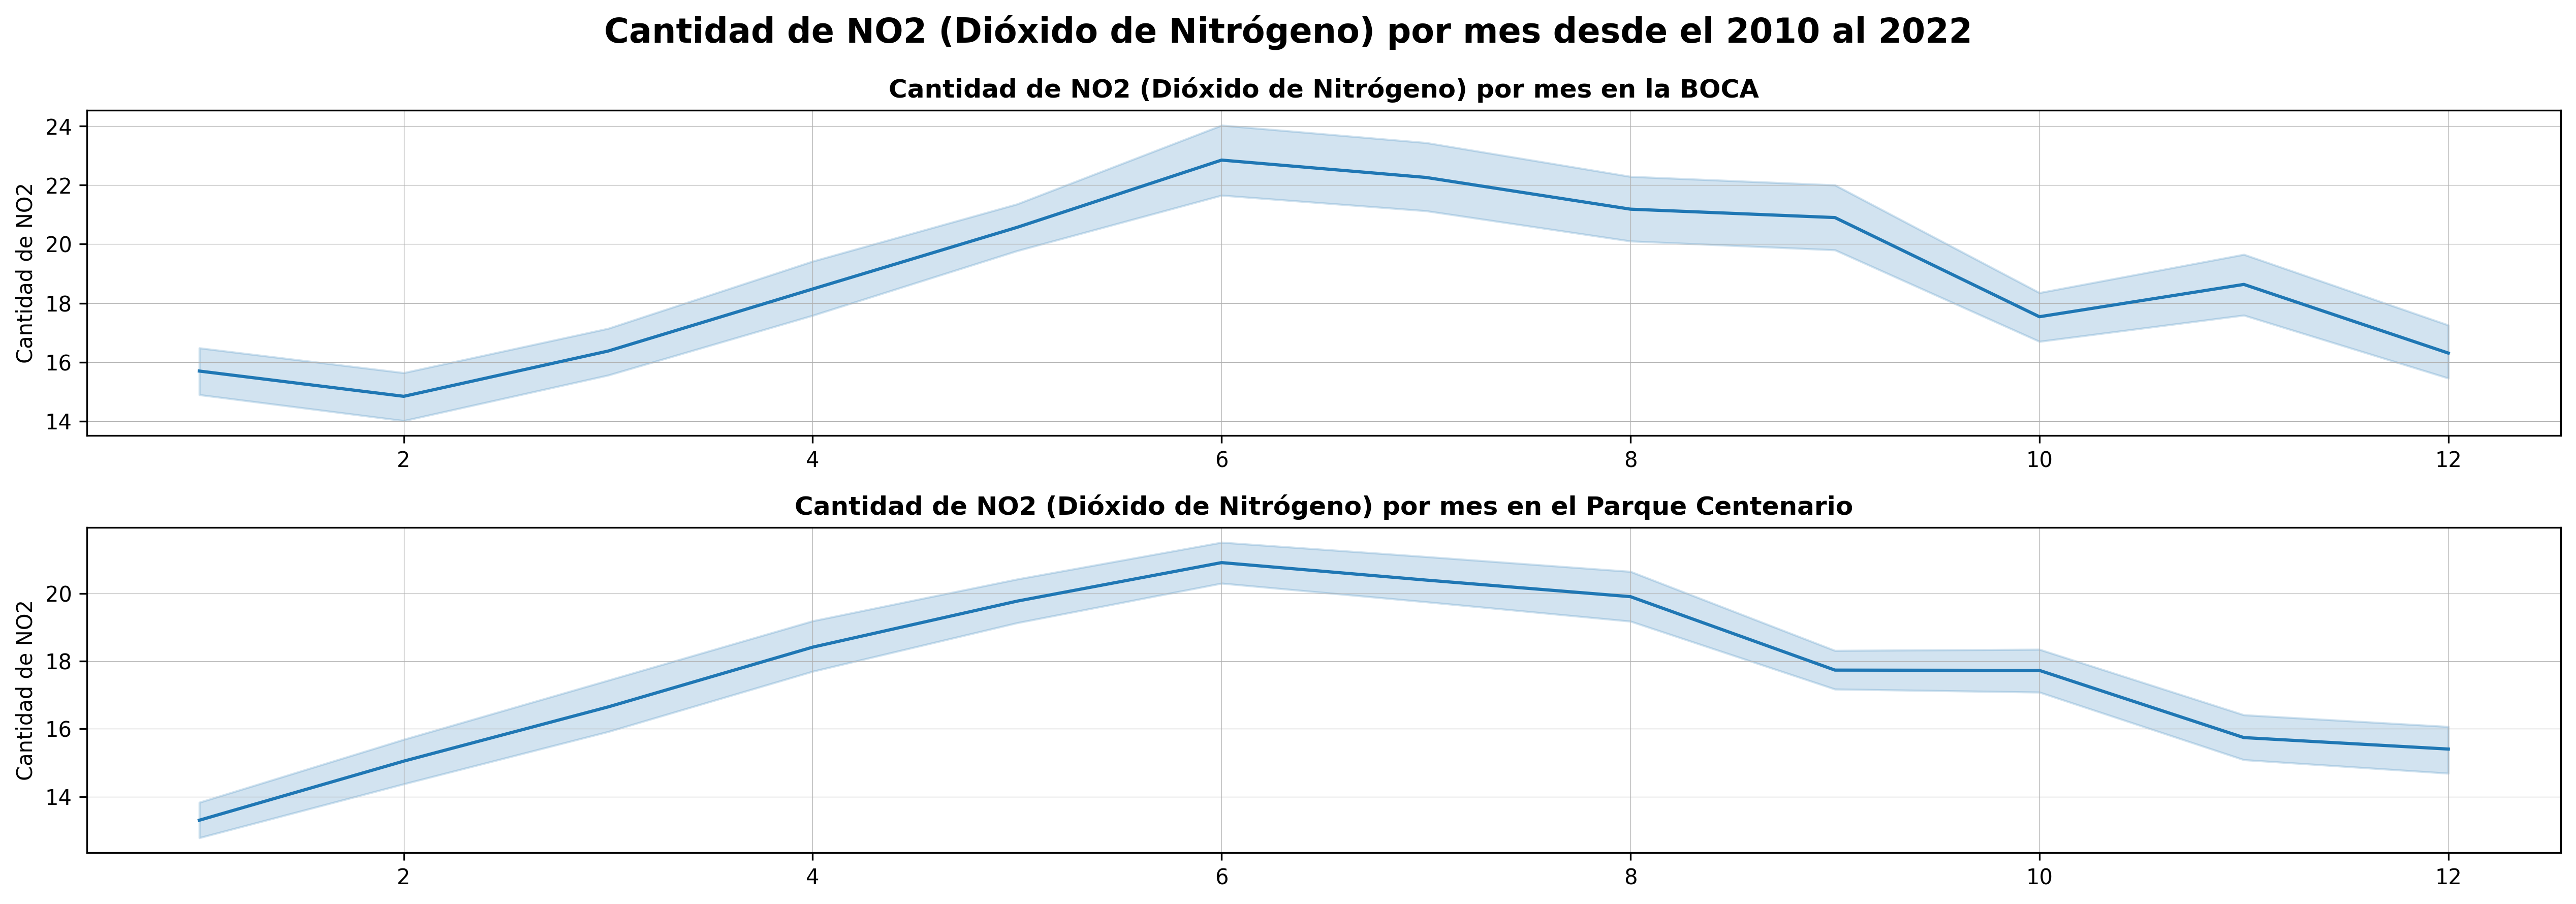

In [88]:
plt.rcParams.update({'figure.figsize':(17,6),'figure.dpi':300})
fig,ax = plt.subplots(nrows=2, ncols=1)
plt.suptitle('Cantidad de NO2 (Dióxido de Nitrógeno) por mes desde el 2010 al 2022',size=16,weight='bold')



sns.lineplot(data=df_boca_no2,x='mes',y='NO2_LA_BOCA',ax=ax[0]) 
ax[0].set_title('Cantidad de NO2 (Dióxido de Nitrógeno) por mes en la BOCA',size=12,weight='bold')
ax[0].grid(linestyle='-',linewidth=0.3)
ax[0].set_ylabel('Cantidad de NO2')
ax[0].set_xlabel(None)


sns.lineplot(data=df_centenario_no2,x='mes',y='NO2_CENTENARIO',ax=ax[1])
ax[1].set_title('Cantidad de NO2 (Dióxido de Nitrógeno) por mes en el Parque Centenario',size=12,weight='bold')
ax[1].grid(linestyle='-',linewidth=0.3)
ax[1].set_ylabel('Cantidad de NO2')
ax[1].set_xlabel(None)

fig.tight_layout()
plt.show()

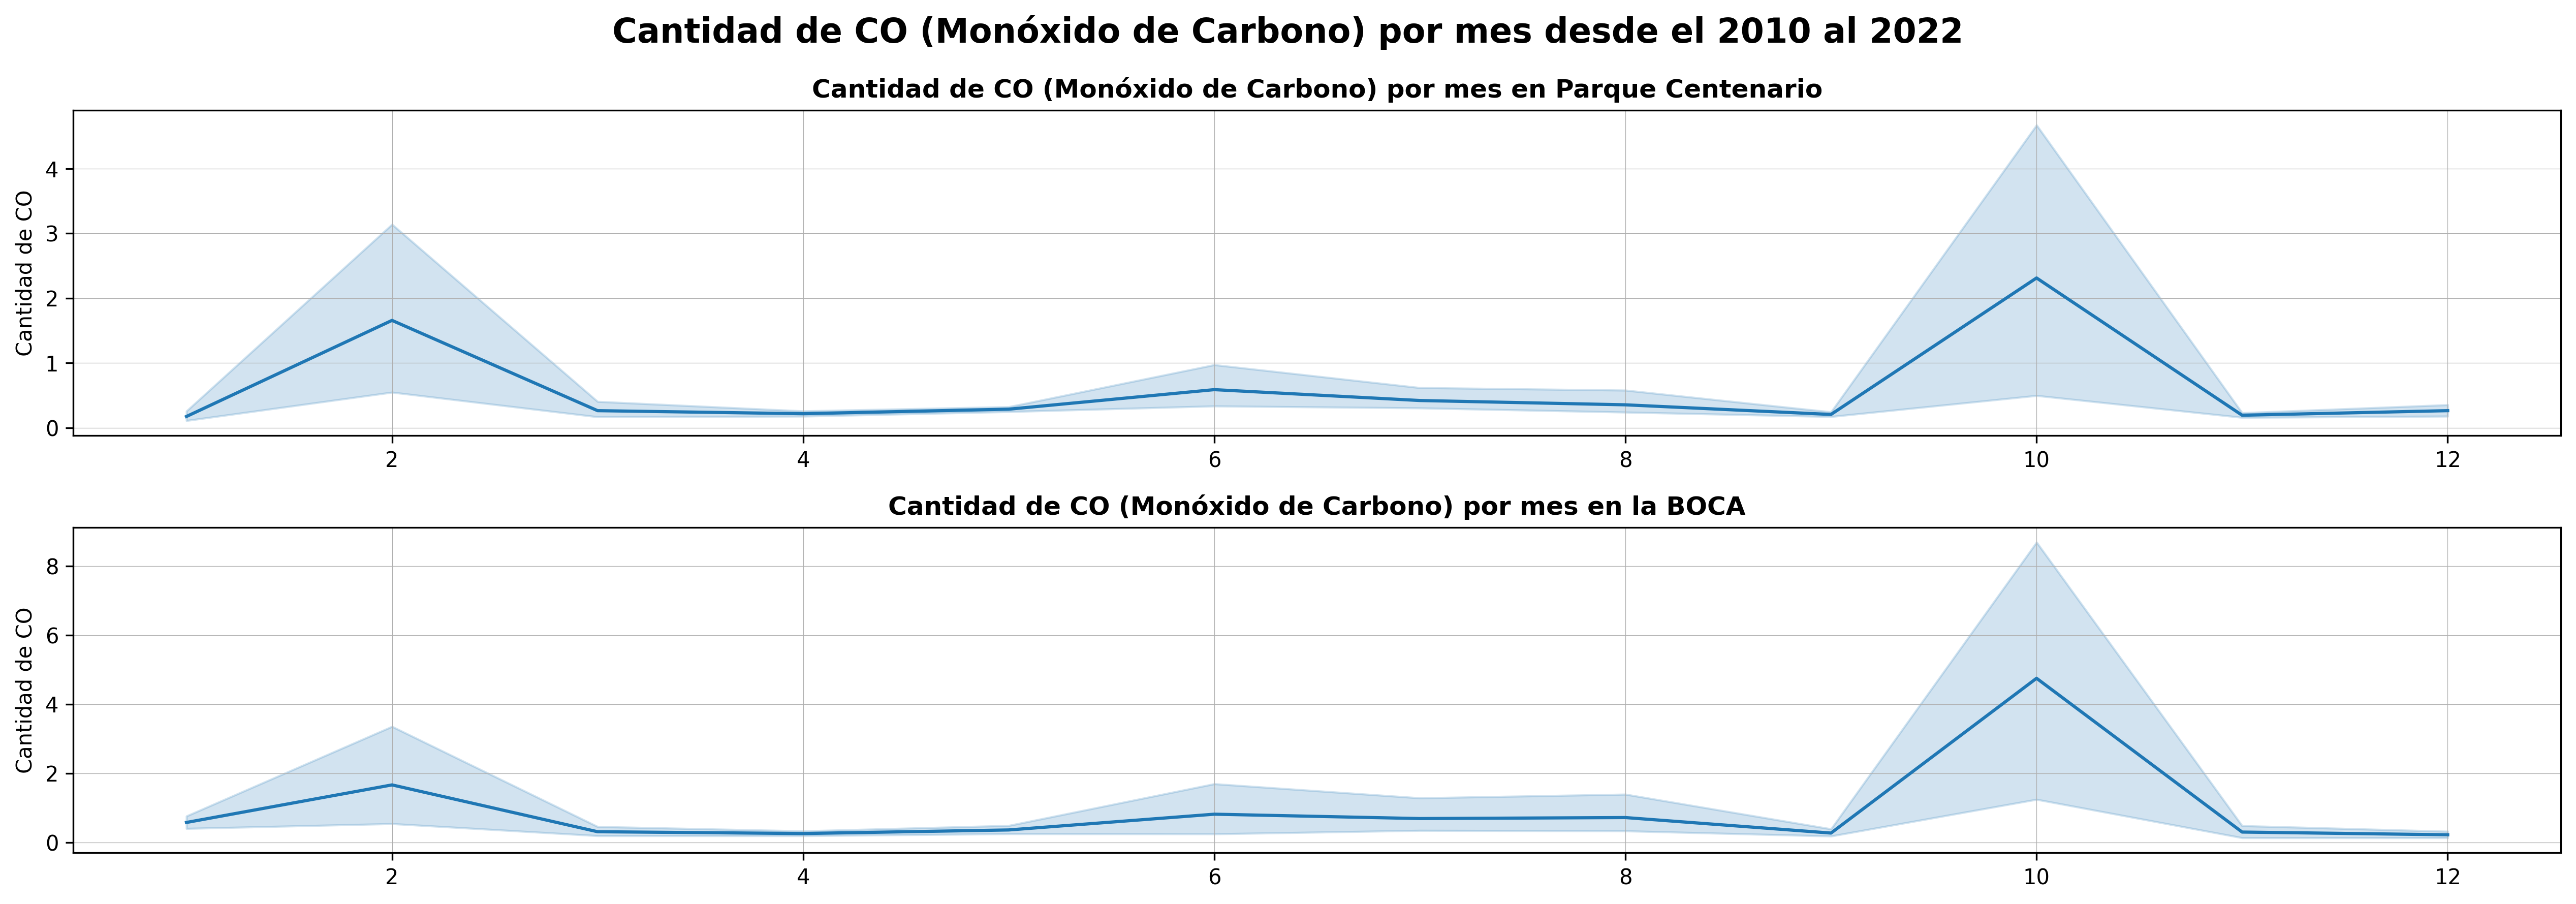

In [89]:
plt.rcParams.update({'figure.figsize':(17,6),'figure.dpi':300})
fig,ax = plt.subplots(nrows=2, ncols=1)

plt.suptitle('Cantidad de CO (Monóxido de Carbono) por mes desde el 2010 al 2022',size=16,weight='bold')

sns.lineplot(data=df_centenario_co,x='mes',y='CO_CENTENARIO',ax=ax[0])
ax[0].set_title('Cantidad de CO (Monóxido de Carbono) por mes en Parque Centenario',size=12,weight='bold')
ax[0].grid(linestyle='-',linewidth=0.3)
ax[0].set_ylabel('Cantidad de CO')
ax[0].set_xlabel(None)



sns.lineplot(data=df_boca_co,x='mes',y='CO_LA_BOCA',ax=ax[1])
ax[1].set_title('Cantidad de CO (Monóxido de Carbono) por mes en la BOCA',size=12,weight='bold')
ax[1].grid(linestyle='-',linewidth=0.3)
ax[1].set_ylabel('Cantidad de CO')
ax[1].set_xlabel(None)


fig.tight_layout()
plt.show()

In [90]:
df_centenario_no2

Fecha  NO2_CENTENARIO  dia  dia_año  mes
131  2009-10-01       34.700000    3      274   10
289  2009-10-02       30.750000    4      275   10
603  2009-10-04       23.833333    6      277   10
761  2009-10-05       29.250000    0      278   10
919  2009-10-06       24.958333    1      279   10
...         ...             ...  ...      ...  ...
4062 2022-10-26       14.791667    2      299   10
4219 2022-10-27       14.625000    3      300   10
4376 2022-10-28       20.416667    4      301   10
4522 2022-10-29       16.500000    5      302   10
4665 2022-10-30        8.166667    6      303   10

[4051 rows x 5 columns]

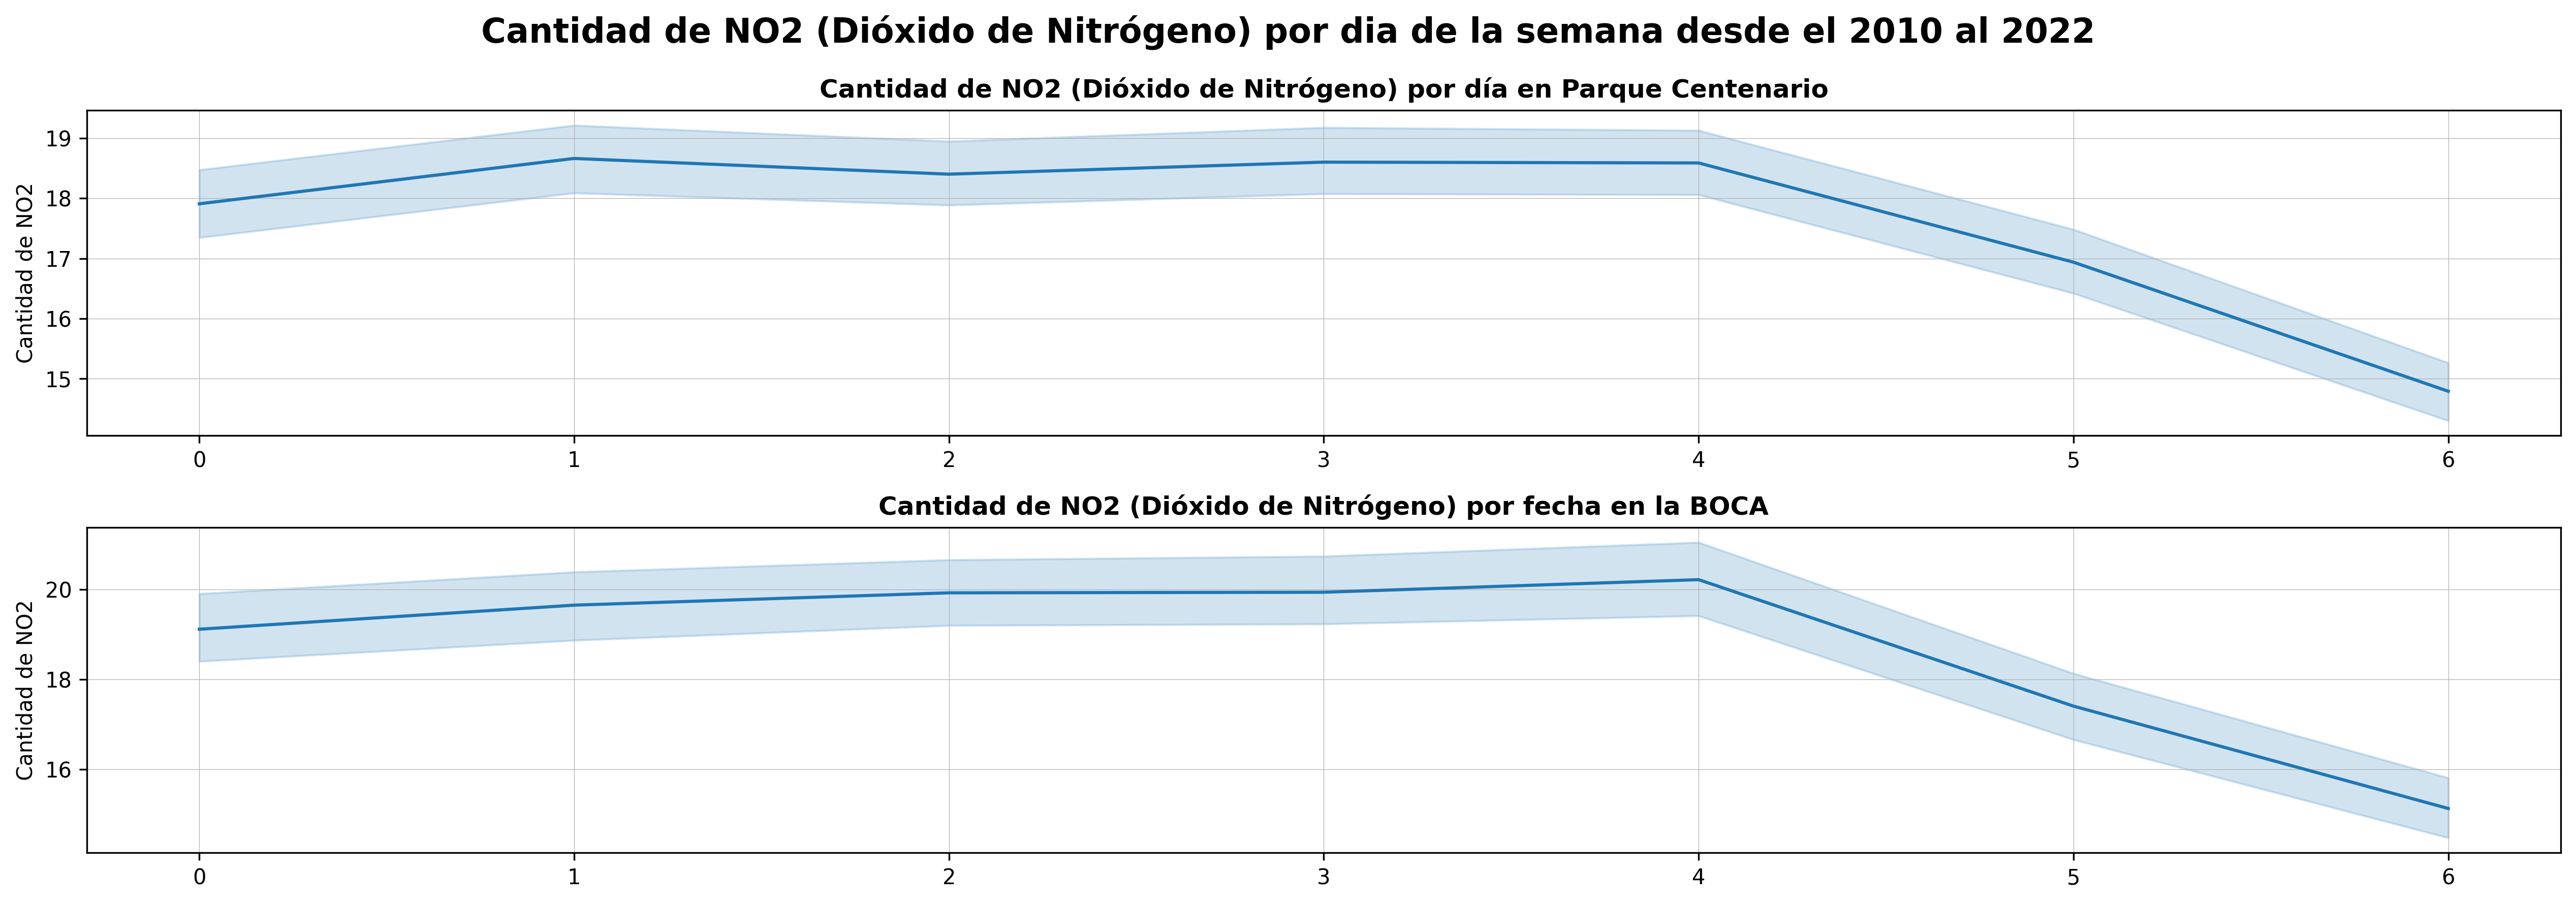

In [91]:
plt.rcParams.update({'figure.figsize':(17,6),'figure.dpi':300})
fig,ax = plt.subplots(nrows=2, ncols=1)
plt.suptitle('Cantidad de NO2 (Dióxido de Nitrógeno) por dia de la semana desde el 2010 al 2022',size=16,weight='bold')


sns.lineplot(data=df_centenario_no2,x='dia',y='NO2_CENTENARIO',ax=ax[0])
ax[0].set_title('Cantidad de NO2 (Dióxido de Nitrógeno) por día en Parque Centenario',size=12,weight='bold')
ax[0].grid(linestyle='-',linewidth=0.3)
ax[0].set_ylabel('Cantidad de NO2')
ax[0].set_xlabel(None)


sns.lineplot(data=df_boca_no2,x='dia',y='NO2_LA_BOCA',ax=ax[1])
ax[1].set_title('Cantidad de NO2 (Dióxido de Nitrógeno) por fecha en la BOCA',size=12,weight='bold')
ax[1].grid(linestyle='-',linewidth=0.3)
ax[1].set_ylabel('Cantidad de NO2')
ax[1].set_xlabel(None)




fig.tight_layout()
plt.show()

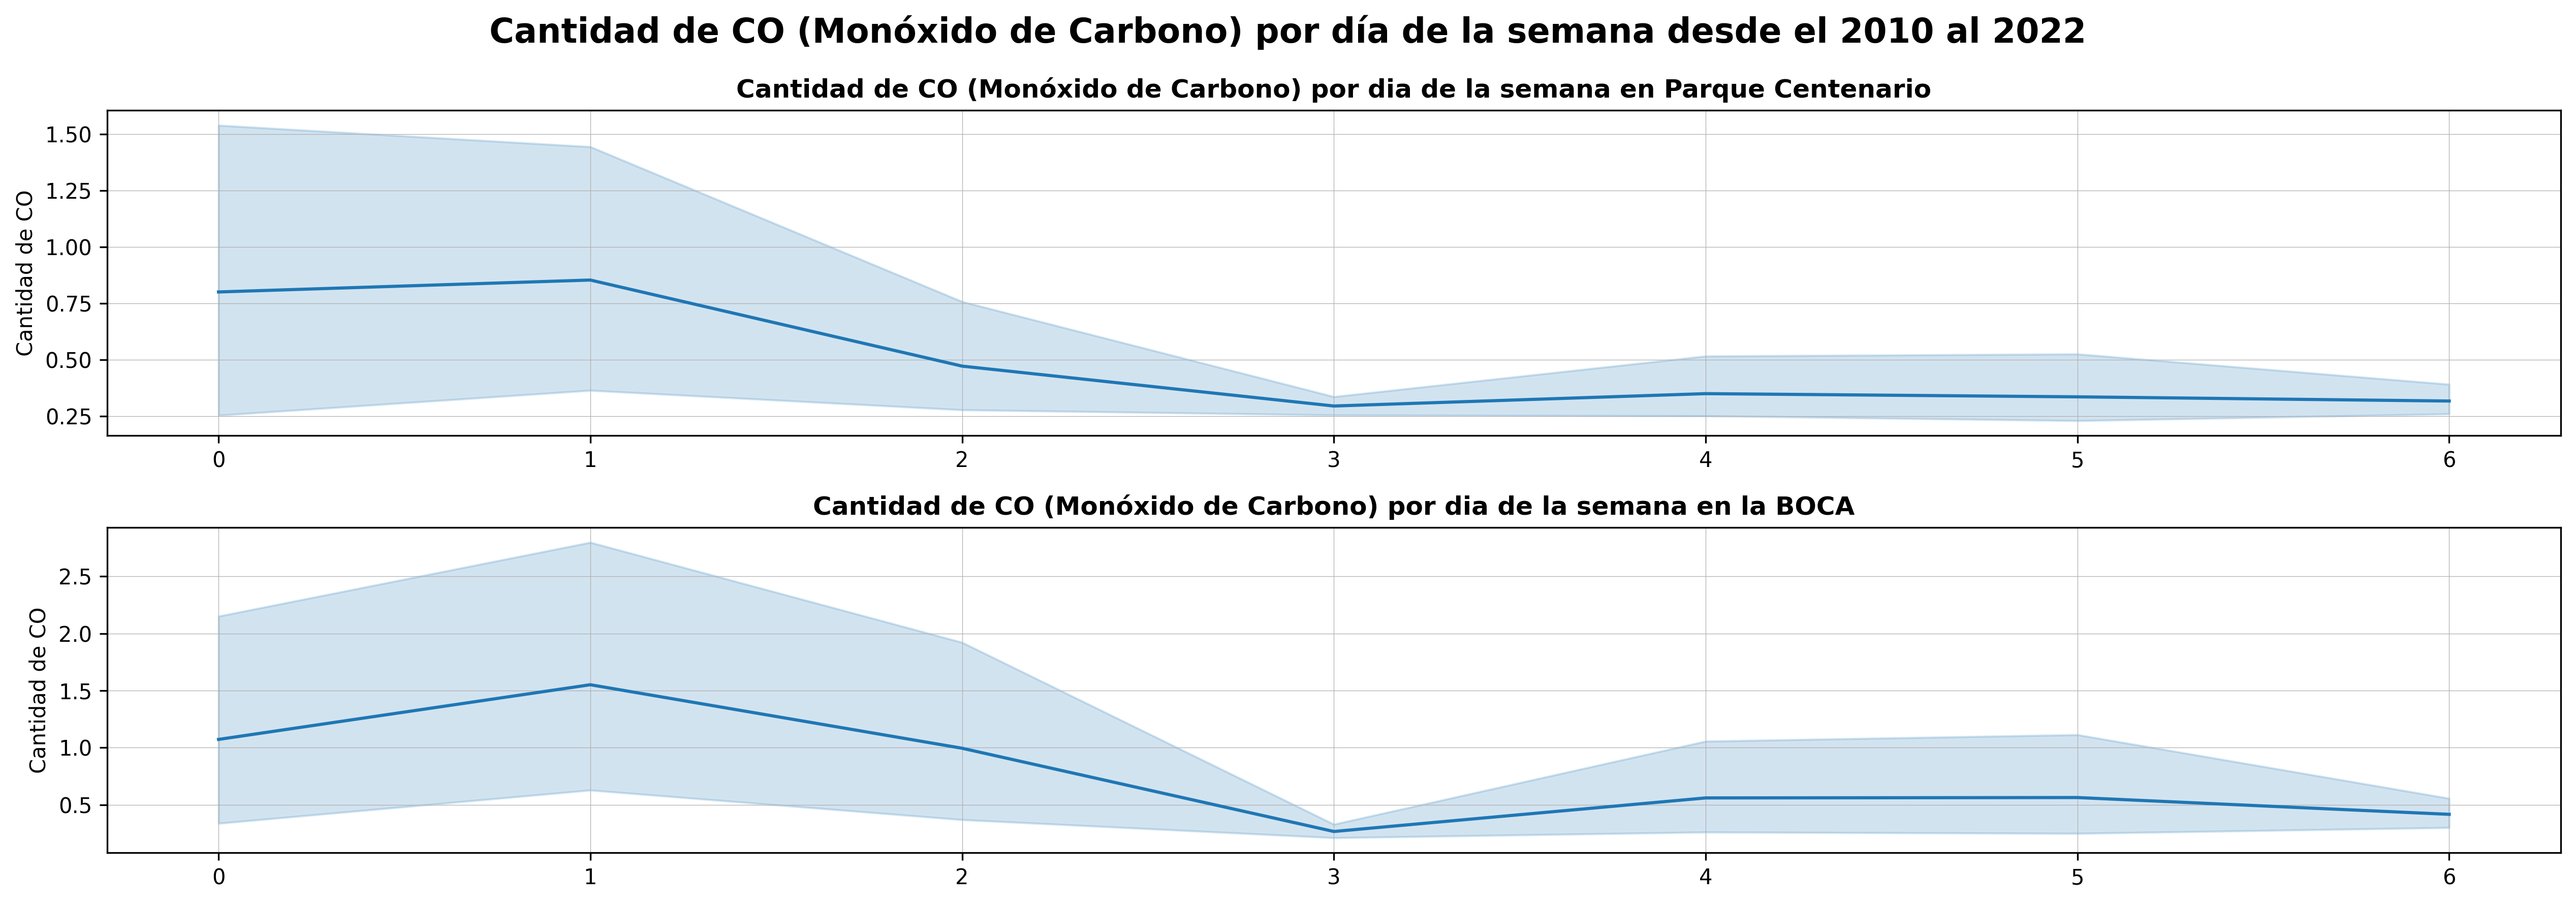

In [92]:
plt.rcParams.update({'figure.figsize':(17,6),'figure.dpi':300})
fig,ax = plt.subplots(nrows=2, ncols=1)

plt.suptitle('Cantidad de CO (Monóxido de Carbono) por día de la semana desde el 2010 al 2022',size=16,weight='bold')

sns.lineplot(data=df_centenario_co,x='dia',y='CO_CENTENARIO',ax=ax[0])
ax[0].set_title('Cantidad de CO (Monóxido de Carbono) por dia de la semana en Parque Centenario',size=12,weight='bold')
ax[0].grid(linestyle='-',linewidth=0.3)
ax[0].set_ylabel('Cantidad de CO')
ax[0].set_xlabel(None)



sns.lineplot(data=df_boca_co,x='dia',y='CO_LA_BOCA',ax=ax[1])
ax[1].set_title('Cantidad de CO (Monóxido de Carbono) por dia de la semana en la BOCA',size=12,weight='bold')
ax[1].grid(linestyle='-',linewidth=0.3)
ax[1].set_ylabel('Cantidad de CO')
ax[1].set_xlabel(None)


fig.tight_layout()
plt.show()

In [93]:
df_centenario_co['mes'].value_counts()

6     155
5     140
7     128
8     112
4      60
9      52
11     43
10     37
12     20
2      17
3      13
1      13
Name: mes, dtype: int64

In [94]:
df_centenario_co['dia'].value_counts()

4    139
5    122
1    115
3    115
2    107
0     98
6     94
Name: dia, dtype: int64

In [95]:
df_centenario_no2.isnull().sum()

Fecha             0
NO2_CENTENARIO    0
dia               0
dia_año           0
mes               0
dtype: int64

In [96]:
df_centenario_no2.dtypes

Fecha             datetime64[ns]
NO2_CENTENARIO           float64
dia                        int64
dia_año                    int64
mes                        int64
dtype: object

In [97]:
df_centenario_no2['año'] = df_centenario_no2['Fecha'].astype(str).str[:4]
df_centenario_no2['año']= df_centenario_no2['año'].astype('int64')

df_centenario_no2['mes'] = df_centenario_no2['Fecha'].astype(str).str[5:7]
df_centenario_no2['mes'] = df_centenario_no2['mes'].astype('int64')

df_centenario_no2['dia'] = df_centenario_no2['Fecha'].astype(str).str[8:]
df_centenario_no2['dia'] = df_centenario_no2['dia'].astype('int64')

df_centenario_no2

Fecha  NO2_CENTENARIO  dia  dia_año  mes   año
131  2009-10-01       34.700000    1      274   10  2009
289  2009-10-02       30.750000    2      275   10  2009
603  2009-10-04       23.833333    4      277   10  2009
761  2009-10-05       29.250000    5      278   10  2009
919  2009-10-06       24.958333    6      279   10  2009
...         ...             ...  ...      ...  ...   ...
4062 2022-10-26       14.791667   26      299   10  2022
4219 2022-10-27       14.625000   27      300   10  2022
4376 2022-10-28       20.416667   28      301   10  2022
4522 2022-10-29       16.500000   29      302   10  2022
4665 2022-10-30        8.166667   30      303   10  2022

[4051 rows x 6 columns]

In [98]:
df_centenario_no2.value_counts()

Fecha       NO2_CENTENARIO  dia  dia_año  mes  año 
2009-10-01  34.700000       1    274      10   2009    1
2018-05-04  17.000000       4    124      5    2018    1
2018-04-21  15.416667       21   111      4    2018    1
2018-04-22  23.083333       22   112      4    2018    1
2018-04-23  15.000000       23   113      4    2018    1
                                                      ..
2014-04-22  19.708333       22   112      4    2014    1
2014-04-23  1.000000        23   113      4    2014    1
2014-05-15  8.208333        15   135      5    2014    1
2014-05-16  20.666667       16   136      5    2014    1
2022-10-30  8.166667        30   303      10   2022    1
Length: 4051, dtype: int64

In [99]:
#df_centenario_no2.set_index('Fecha',inplace=True)

In [100]:
#df_centenario_no2['Lag_1'] = df_centenario_no2.shift(1)


In [101]:
#df_centenario_no2

In [102]:
#df_centenario_no2.drop(index='2011-04-01')

In [103]:
#df_centenario_no2.isnull().sum()

In [104]:


#df_centenario_no2= df_centenario_no2.dropna()

#df_centenario_no2[df_centenario_no2.isnull().any(axis=1)]

In [105]:
#y = df_centenario_no2['NO2_CENTENARIO']
#X= df_centenario_no2[['Lag_1']]

In [106]:
X = df_centenario_no2[['año','mes','dia']]
y = df_centenario_no2['NO2_CENTENARIO']

In [107]:



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [108]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2835, 3)
(1216, 3)
(2835,)
(1216,)


In [109]:
#model = HistGradientBoostingRegressor(  max_depth = 7, random_state = 18)
#model.fit(X_train,y_train)

In [110]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())
print(X_test.isnull().sum())

año    0
mes    0
dia    0
dtype: int64
0
año    0
mes    0
dia    0
dtype: int64


In [111]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 7, random_state = 18)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=300,
                      random_state=18)

In [112]:
#pickle file
pickle.dump(rf,open("model.pkl","wb"))

In [113]:
y_pred = pd.Series(rf.predict(X_test), index=X_test.index)

In [114]:
rf.predict(X_test)

array([16.34450228, 26.05867518, 17.08866808, ..., 19.0460709 ,
       17.75909526, 18.43437841])

In [115]:
X_test

año  mes  dia
153   2018    9    1
2146  2010    5   14
1425  2016    4   10
3693  2017    6   24
1870  2019   10   12
...    ...  ...  ...
3922  2013    4   26
3686  2010    6   24
3409  2021    5   22
3144  2017    4   21
584   2018    5    4

[1216 rows x 3 columns]

In [116]:
rf.predict([[2014,3,3]])

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([14.03288401])

In [117]:
#fig, ax = plt.subplots()
#ax.plot(X_test['Lag_1'], y_test, '.', color='0.25')
#ax.plot(X_test['Lag_1'], y_pred)
#ax.set_aspect('equal')
#ax.set_ylabel('NumVehicles')
#ax.set_xlabel('Lag_1')
#ax.set_title('Lag Plot of Tunnel Traffic');